## 09, Ch 03. Subband structure

### Laplace equation in 2D
* Laplacian operator in 2D(xy-plane)
  - A second-order differentiation
    $$\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2} $$
* Laplace equation in 2D(xy-plane)
  - For a function, $\phi(x,y)$, the Laplace equation reads
    $$\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2} \right)\phi(x,y)=0 $$
  - Of course, we need boundary conditions.
### An example
* Consider a rectangle.
  - A common spacing of $\Delta$ is assumed.
  - Along the x-direction, $n_x$ points are assigned.
  - Along the y-direction, $n_y$ points are assigned.
  - Mixed boundary condition will be considered later.
### Solution vector
* The solution vector is a vector.
  - We must assign an integer to each one.
  - There can be many different ways to assign the index.
  - In this example, we change y more frequently.
  - The index is given by (iy-1)*nx+ix.
### Discretization
* How to assign equations
  - Basically, the Laplace equation for a given node is integrated over its control volume.
    $$\int_{volume}\nabla^2\phi dr=\oint_{surface}\nabla\phi\cdot da $$
  - The integrated form can be discretized as
    $$\phi_{i+1,j}+\phi_{i,j+1}-4\phi_{i,j}+\phi_{i-1,j}+\phi_{i,j-1} $$
    (Thickness along the x-direction is assumed to be unity)
  - Special care for the boundary nodes is required.
### Our example
* Consider a toy problem.
  - Here, $n_x=9$ and $n_y=5$.
  - Empty circles: Bulk nodes. Their discretization is alreay studied.
  - Black circles: Homogeneous Neumann boundary condition(도함수(기울기)값을 지정하는 방식, 0=oxide, source junction, drain junction, gate oxide)
  - Blue circles: The function is zero(source electrode) 
  - Red circles: The function is unity(Drain electrode)
### Boundary condition(1)
* Dirichlet boundary condition
  - It is not difficult to consider the Dirichlet boundary condition.
  - For a (ix,iy) node, we simply have $\phi_{ix,iy)=0$ (for blue circules) or $\phi_{ix,iy}=1$ (for red circles).
### Boundary conditions(2)
* Consider a node with a black circle(left boundary)
  - Now, the integrated form of the Laplacian operator reads
    $$\phi_{2,j}+0.5\phi_{1,j+1}-2\phi_{1,j}+0.5\phi_{1,j-1}$$
  - Similar expressions hold for other boundary nodes.
  - When you build the Jacobian matrix, you should be careful.
  - An edge-wise construction would be beneficial
### Problem
* Solve our toy problem.(Laplace equation in the 2D space)
* Consider four cases:
  - the red circles are located in the original position.(Dirichlet)
  - the blue circles are located in the top/left position.(Dirichlet)
  - the green circles are located in the bottom position.(Dirichlet)
  - At all three positions above, the function is unity.
  - Draw 3D graphs for each of them.

Neumann 경계 조건은 미분 방정식에서 사용되는 경계 조건 중 하나입니다. 특히, PDE(편미분 방정식)를 해결할 때 경계에서 함수의 값이 아니라 도함수(기울기) 값을 지정하는 방식입니다. Neumann 경계 조건은 다음과 같이 표현됩니다. 예를 들어, 전위의 기울기를 0으로 하면, 전기장이 없다는 뜻이 됩니다.
$$\frac{\partial u}{\partial n}=g(x) $$
여기서:
$u$는 미지 함수입니다.
$\frac{\partial u}{\partial n}$은 경계의 법선 방향에 대한 도함수입니다.
$g(x)$는 경계에서 주어진 함수입니다.

이 조건은 열전도 방정식, 유체 역학, 전자기학 등의 물리 문제에서 많이 사용됩니다. 예를 들어, 벽을 따라 열 흐름을 유지하거나 고체의 변형을 제어하는 경우 유용할 수 있습니다.

Dirichlet 경계 조건은 경계에서 함수의 값을 직접 지정하는 방식입니다. 즉, 해당 지점에서 해결하고자 하는 함수의 값을 고정하는 것입니다.
Dirichlet 경계 조건은 경계에서 어떤 물리량의 정확한 값을 지정하는 조건이에요.
예를 들어, 반도체 시뮬레이션에서 접촉(금속과 반도체가 맞닿는 부분)에서는 **전위(전압)**를 고정된 값으로 정해주는 경우가 많습니다.
이때 사용하는 것이 바로 Dirichlet 경계 조건이에요.
수학적으로 표현하면:
$$u(x)=f(x) $$
여기서:
$u(x)$는 미지 함수입니다.
$f(x)$는 경계에서 주어진 값입니다.

예를 들어, 열전도 문제에서 특정 지점의 온도를 일정하게 유지하고 싶다면 Dirichlet 경계 조건을 사용할 수 있습니다. 반면, Neumann 경계 조건은 값이 아니라 미분(기울기)을 설정하는 것이죠.

### Mesh & position
 각 point의 indexing을 왼쪽 맨 위를 1번으로 하여 +x축 방향으로 증가하게 하고, -y축 방향으로 index가 증가(Matlab).  
  a) for left side Neumann boundary(index=10,19,28)   
  $$\phi_{i+1,j}-2\phi_{i,j}+0.5\phi_{i,j+1}+0.5\phi_{i,j-1}=0$$
  b) for right side Neumann boundary(index=18,27,36)   
  $$\phi_{i+1,j}-2\phi_{i,j}+0.5\phi_{i,j+1}+0.5\phi_{i,j-1}=0$$   
  c) for top side Neumann boundary(index=3,4,5,6,7)   
  $$0.5\phi_{i+1,j}-2\phi_{i,j}+0.5\phi_{i-1,j}+\phi_{i,j+1}=0$$   
  d) for contact Dirichlet boundary(index=1,2,8,9,37~45)  
  $$\phi_{i,j}=V_{applied}$$
  e) for the rest of points   
  $$\phi_{i+1,j}+\phi_{i-1,j}-4\phi_{i,j}+\phi_{i,j+1}+\phi_{i,j-1}=0$$
  

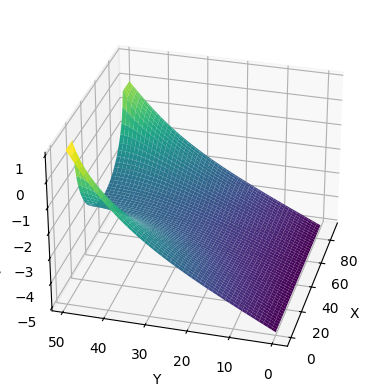

In [20]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Mesh, Nxx=9, Nyy=5, Source=2, Drain=8 ###
Nxx = 90   # X axis mesh
Nyy = 50   # Y axis mesh

### Change Vd, Vs, Vsub and  ax.view_init(elev=30, azim=135) azim ###
Source = 10
Drain = 80
Vd = 0      # Drain Bias
Vs = 1      # Source Bias
Vsub = -5    # Substrate Bias

# Sparse matrix and RHS vector
size = Nxx * Nyy
A = sp.lil_matrix((size, size))
b = np.zeros((size, 1))

# Fill matrix A and vector b
for iy in range(1, Nyy + 1):
    for ix in range(1 + (iy - 1) * Nxx, Nxx + (iy - 1) * Nxx + 1):
        idx = ix - 1  # Python uses 0-based indexing

        if iy == 1:
            if ix <= Source:
                A[idx, idx] = 1
                b[idx] = Vs
            elif ix >= Drain:
                A[idx, idx] = 1
                b[idx] = Vd
            else:
                A[idx, idx] = -2
                A[idx, idx + 1] = 0.5
                A[idx, idx - 1] = 0.5
                A[idx, idx + Nxx] = 1
                b[idx] = 0

        elif iy == Nyy:
            A[idx, idx] = 1
            b[idx] = Vsub

        else:
            if ix == 1 + Nxx * (iy - 1):  # left edge (Neumann)
                A[idx, idx] = -2
                A[idx, idx + 1] = 1
                A[idx, idx + Nxx] = 0.5
                A[idx, idx - Nxx] = 0.5
                b[idx] = 0
            elif ix == Nxx + Nxx * (iy - 1):  # right edge (Neumann)
                A[idx, idx] = -2
                A[idx, idx - 1] = 1
                A[idx, idx + Nxx] = 0.5
                A[idx, idx - Nxx] = 0.5
                b[idx] = 0
            else:
                A[idx, idx] = -4
                A[idx, idx + 1] = 1
                A[idx, idx - 1] = 1
                A[idx, idx + Nxx] = 1
                A[idx, idx - Nxx] = 1
                b[idx] = 0

# Solve the linear system
A_csr = A.tocsr()
phi = spla.spsolve(A_csr, b)
phi = phi.reshape((Nyy, Nxx))

# Plot
x = np.arange(0, Nxx)
y = np.arange(Nyy - 1, -1, -1)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=195) #135 195
# 3D 그래프를 돌리는(회전하는) 방법은 matplotlib의 view_init() 함수를 사용하는 것
# elev: 위에서 내려다보는 각도 (기본 30~45도 추천) ax.view_init(45, 60) 위에서 약간 보고, 오른쪽 위에서 보는 느낌
# azim: 수평 회전 각도 (0~360도, 시계방향) ax.view_init(20, 180) 거의 정면에서 보는 시점
ax.plot_surface(X, Y, phi, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential φ')

plt.show()
